In [17]:
#importing libraries
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Model, save_model

import matplotlib.pyplot as plt
import seaborn as sb

## Reading and Processing Data

In [2]:
directory = "../dataset"

In [3]:
batch_size = 64
IMG_SIZE = (224, 224, 3)

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_SIZE[0], IMG_SIZE[1]),
    batch_size=batch_size,
    shuffle=True
    )

Found 1835 files belonging to 30 classes.
Using 1468 files for training.


In [5]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE[0], IMG_SIZE[1]),
    batch_size=batch_size,
    )

Found 1835 files belonging to 30 classes.
Using 367 files for validation.


In [6]:
class_names = (train_ds.class_names)

In [7]:
#saving class names
np.save("../artifacts/class_names.npy", class_names)

In [8]:
NUM_CLASSES = 30

## Modelling

In [9]:
# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential(
    [
        keras.layers.Rescaling(1./ 255),
        keras.layers.RandomFlip(),
        keras.layers.RandomRotation(0.2),
        keras.layers.RandomZoom(0.2,0.3)
    ]
)

In [10]:
pre_trained_layers = keras.applications.ResNet50V2(weights="imagenet", include_top=False,
           input_tensor=keras.Input(shape=IMG_SIZE))

In [11]:
pre_trained_layers.trainable = False

In [12]:
pre_trained_layers.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

In [13]:
model = keras.Sequential([
    data_augmentation, # data augmentations
    pre_trained_layers, # ResNet pre-trained layers
    keras.layers.Flatten(name="flatten"),
    keras.layers.Dense(1024, activation='relu', name='fc_1'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu', name='fc_2'),
    keras.layers.Dense(NUM_CLASSES, activation='softmax', name='output')
])

In [14]:
EPOCHS = 80
LR = 1e-3

In [15]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LR),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [18]:
callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, mode='auto',
                             min_delta=0.0001, cooldown=0, min_lr=0.00001)

In [19]:
history = model.fit(train_ds, epochs=EPOCHS, validation_data=validation_ds, callbacks=callback)

Epoch 1/80
23/23 [==============================] - 134s 5s/step - loss: 13.2078 - accuracy: 0.1526 - val_loss: 2.9571 - val_accuracy: 0.1362 - lr: 0.0010
Epoch 2/80
23/23 [==============================] - 105s 5s/step - loss: 3.7017 - accuracy: 0.1526 - val_loss: 3.1115 - val_accuracy: 0.0736 - lr: 0.0010
Epoch 3/80
23/23 [==============================] - 141s 6s/step - loss: 3.2111 - accuracy: 0.1819 - val_loss: 2.8982 - val_accuracy: 0.2071 - lr: 0.0010
Epoch 4/80
23/23 [==============================] - 137s 6s/step - loss: 2.8183 - accuracy: 0.2841 - val_loss: 2.3528 - val_accuracy: 0.3297 - lr: 0.0010
Epoch 5/80
23/23 [==============================] - 134s 6s/step - loss: 2.3953 - accuracy: 0.3883 - val_loss: 1.9575 - val_accuracy: 0.4823 - lr: 0.0010
Epoch 6/80
23/23 [==============================] - 140s 6s/step - loss: 2.1908 - accuracy: 0.4843 - val_loss: 1.6037 - val_accuracy: 0.6485 - lr: 0.0010
Epoch 7/80
23/23 [==============================] - 140s 6s/step - loss: 1.

23/23 [==============================] - 165s 7s/step - loss: 0.2689 - accuracy: 0.9203 - val_loss: 0.1975 - val_accuracy: 0.9346 - lr: 1.0000e-05
Epoch 51/80
23/23 [==============================] - 167s 7s/step - loss: 0.2906 - accuracy: 0.9101 - val_loss: 0.1951 - val_accuracy: 0.9346 - lr: 1.0000e-05
Epoch 52/80
23/23 [==============================] - 171s 7s/step - loss: 0.2552 - accuracy: 0.9244 - val_loss: 0.1943 - val_accuracy: 0.9373 - lr: 1.0000e-05
Epoch 53/80
23/23 [==============================] - 169s 7s/step - loss: 0.2596 - accuracy: 0.9271 - val_loss: 0.1933 - val_accuracy: 0.9373 - lr: 1.0000e-05
Epoch 54/80
23/23 [==============================] - 170s 7s/step - loss: 0.2579 - accuracy: 0.9244 - val_loss: 0.1926 - val_accuracy: 0.9401 - lr: 1.0000e-05
Epoch 55/80
23/23 [==============================] - 160s 7s/step - loss: 0.2196 - accuracy: 0.9264 - val_loss: 0.1917 - val_accuracy: 0.9401 - lr: 1.0000e-05
Epoch 56/80
23/23 [==============================] - 147s 

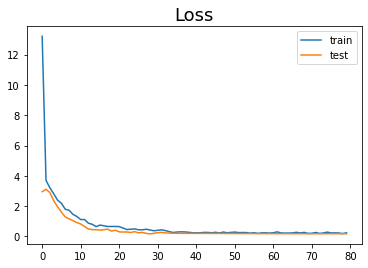

In [20]:
plt.title("Loss", fontdict={'fontsize':18})
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()

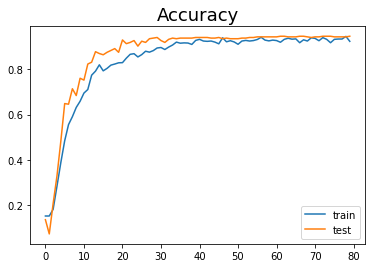

In [21]:
plt.title("Accuracy", fontdict={'fontsize':18})
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()

## Model Performance Analysis

In [22]:
from sklearn.metrics import classification_report

In [23]:
Y_train = []
X_train = []

In [24]:
for data in train_ds:
    X_train.extend(data[0].numpy())
    Y_train.extend(data[1].numpy())

In [25]:
Y_train = np.array(Y_train)
X_train = np.array(X_train)

In [26]:
y_train_pred = model.predict(X_train)
y_train_pred = [np.argmax(i) for i in y_train_pred]

46/46 [==============================] - 82s 2s/step


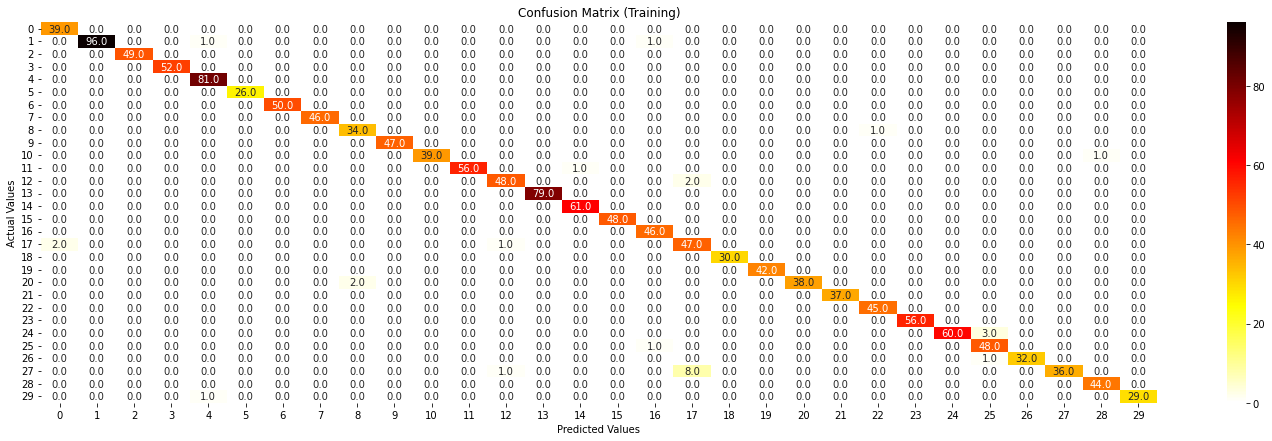

In [27]:
plt.figure(figsize=(25,7))
sb.heatmap(tf.math.confusion_matrix(labels=Y_train,predictions=y_train_pred),annot=True,fmt='.1f', cmap='hot_r')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix (Training)')
plt.show()

In [28]:
print("Classification Report for Training")
print(classification_report(Y_train, y_train_pred))

Classification Report for Training
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.98      0.99        98
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        52
           4       0.98      1.00      0.99        81
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        46
           8       0.94      0.97      0.96        35
           9       1.00      1.00      1.00        47
          10       1.00      0.97      0.99        40
          11       1.00      0.98      0.99        57
          12       0.96      0.96      0.96        50
          13       1.00      1.00      1.00        79
          14       0.98      1.00      0.99        61
          15       1.00      1.00      1.00        48
          16       0.96      1.00      0.98   

In [29]:
X_test = []
y_test = []

In [30]:
for data in validation_ds:
    X_test.extend(data[0].numpy())
    y_test.extend(data[1].numpy())

In [31]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [32]:
y_test

array([ 1, 20, 16,  8,  3, 25,  8, 22, 22,  0, 14, 14, 11, 15,  0, 11,  9,
        4, 21, 19, 26, 12,  1, 13,  1, 13, 27, 16,  4, 17, 14,  7,  3, 17,
        3, 28, 27,  1, 14, 25, 22,  6, 29,  1,  8,  4, 10, 19,  5,  6,  2,
       28, 16,  8, 24, 19,  9, 24,  4, 14, 24, 21, 27,  8, 21, 13, 14,  1,
       19, 19,  9, 23,  2,  8, 25, 16,  5,  1, 25,  5, 24,  6, 13, 28, 18,
        6,  6,  5, 12, 20, 23, 13,  3, 22, 16,  6, 23,  9, 18, 17, 28,  6,
        6, 28,  8,  1,  6,  7,  8, 22, 18,  0, 13, 13, 11, 29, 11, 23,  9,
       27,  9,  3,  6, 14, 12,  8,  1, 17,  1,  3, 13,  9,  3,  6,  1, 18,
        4, 22, 11, 29, 24, 22, 22,  7, 17,  5, 12,  4, 15, 17, 28, 24, 28,
       13,  2, 28,  6,  4,  6,  8,  7,  9, 11, 19,  0,  0, 17, 24, 21,  2,
       29, 26,  7, 21, 22,  6, 13,  4, 21,  4, 14, 14, 18,  8, 11,  9, 16,
       15, 11, 28, 28, 15, 10,  0, 25, 26, 19,  1, 26, 20, 18,  4, 13, 23,
       27, 11,  4,  7,  6, 27, 10,  1,  0, 25, 26, 13, 28,  4, 23, 16, 16,
       24, 14, 12,  9, 24

In [33]:
y_test_pred = model.predict(X_test)
y_test_pred = [np.argmax(i) for i in y_test_pred]

12/12 [==============================] - 31s 3s/step


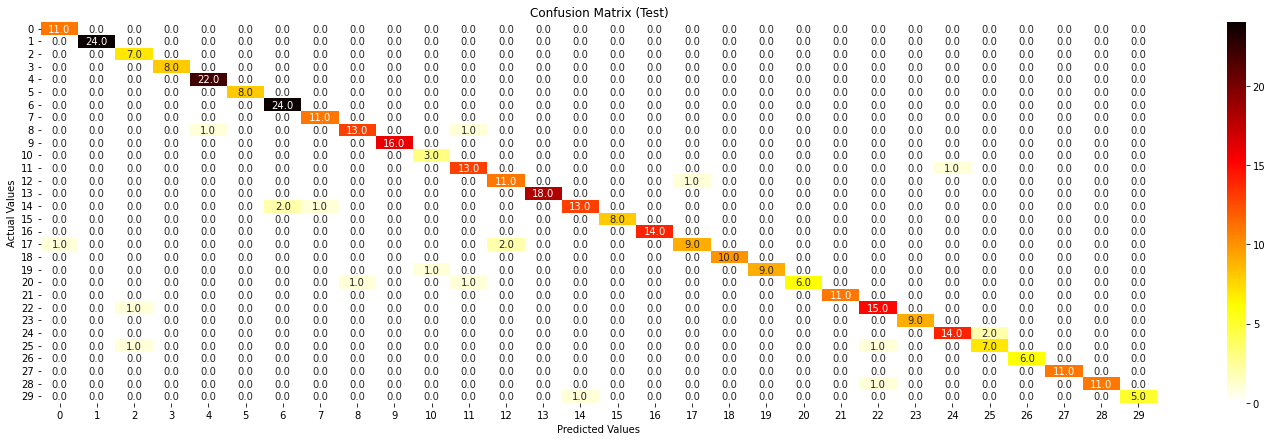

In [34]:
plt.figure(figsize=(25,7))
sb.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=y_test_pred),annot=True,fmt='.1f', cmap='hot_r')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix (Test)')
plt.show()

In [35]:
print("Classification Report for Test")
print(classification_report(y_test, y_test_pred))

Classification Report for Test
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      1.00      1.00        24
           2       0.78      1.00      0.88         7
           3       1.00      1.00      1.00         8
           4       0.96      1.00      0.98        22
           5       1.00      1.00      1.00         8
           6       0.92      1.00      0.96        24
           7       0.92      1.00      0.96        11
           8       0.93      0.87      0.90        15
           9       1.00      1.00      1.00        16
          10       0.75      1.00      0.86         3
          11       0.87      0.93      0.90        14
          12       0.85      0.92      0.88        12
          13       1.00      1.00      1.00        18
          14       0.93      0.81      0.87        16
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00       

## Saving Model

In [36]:
from tensorflow.keras.models import save_model

In [37]:
save_model(model, '../Model/model.h5')

## Predicting

In [38]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

In [39]:
model = load_model('../Model/model.h5')

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 fc_1 (Dense)                (None, 1024)              102761472 
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 fc_2 (Dense)                (None, 128)               131200    
                                                                 
 output (Dense)              (None, 30)               

In [84]:
img = Image.open("../dataset/Alpinia Galanga (Rasna)/AG-S-018.jpg")

In [85]:
predict(img)

(1, 224, 224, 3)
1/1 [==============================] - 0s 137ms/step


(3, 0.3721055)

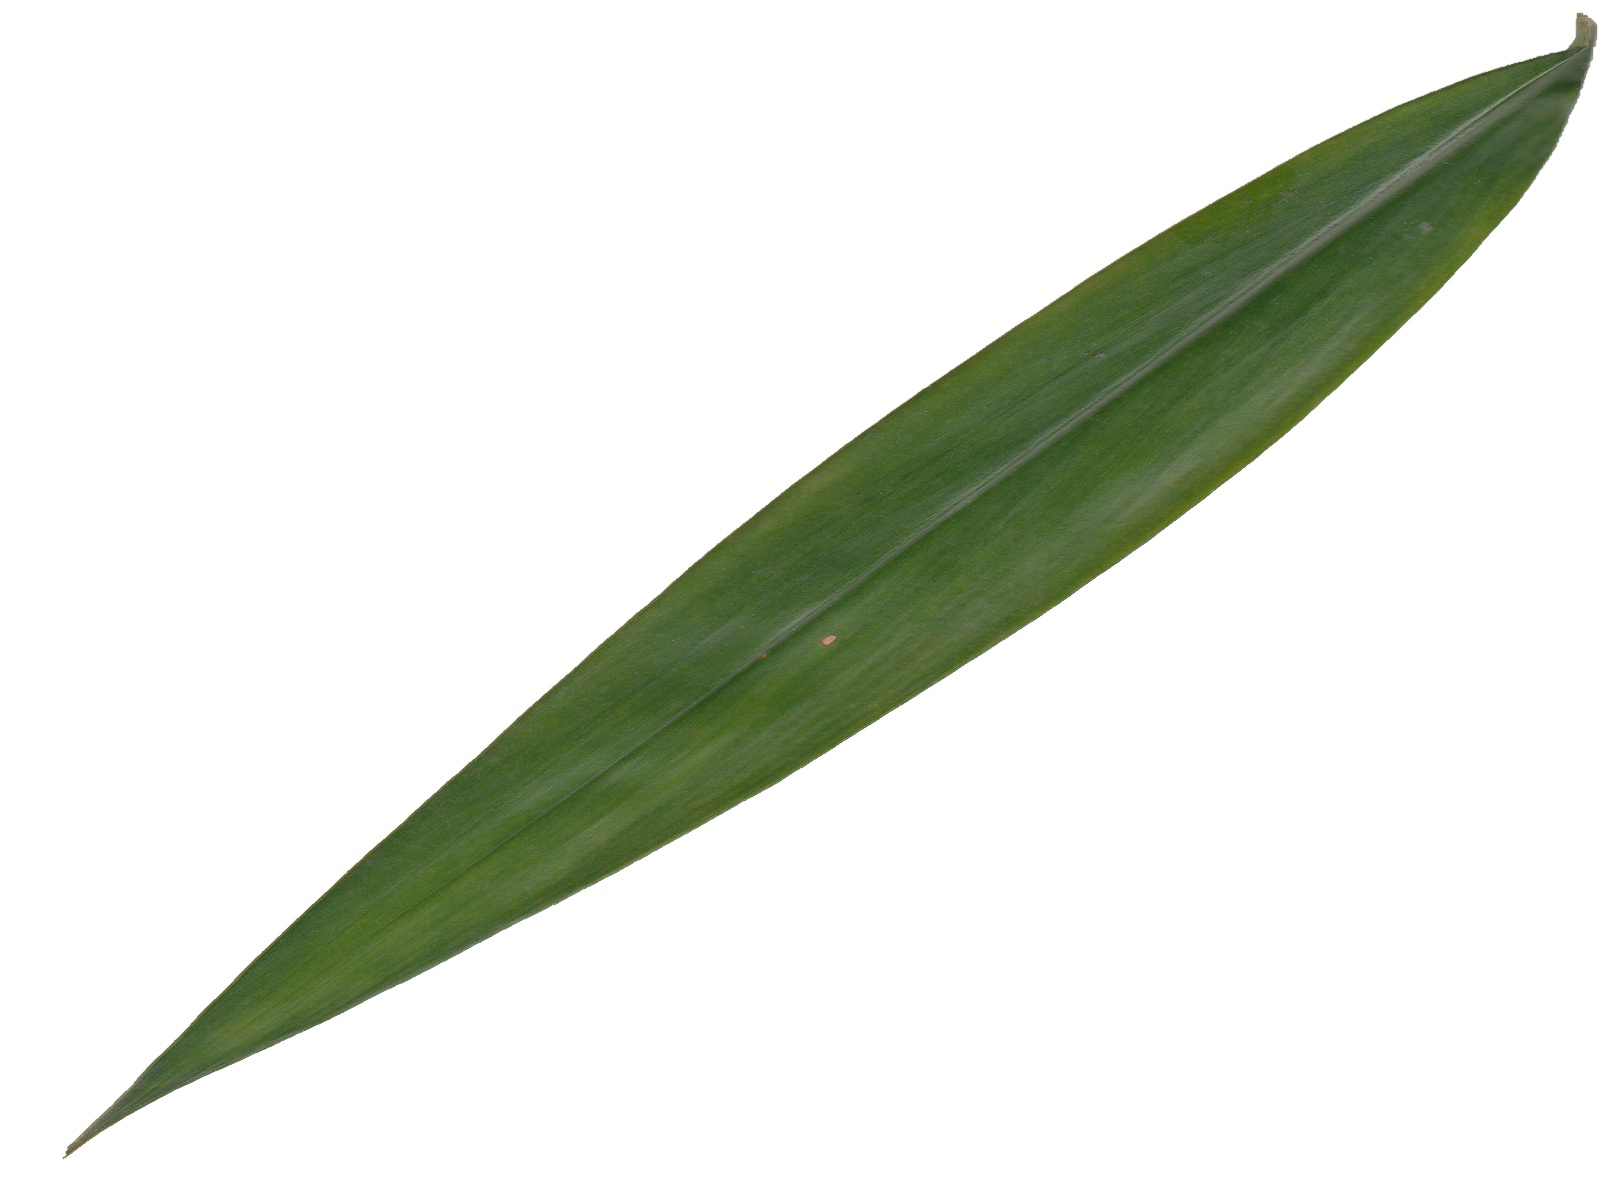

In [86]:
img

In [43]:
def predict(image):
    IMG_SIZE = (1, 224, 224, 3)

    img_arr = np.array(image)
    img_arr = np.resize(img_arr, (IMG_SIZE[1:]))
    img_arr = np.reshape(img_arr, IMG_SIZE)

    print(img_arr.shape)
    pred = model.predict(img_arr)

    return np.argmax(pred), np.max(pred)